## Vis. 1 (DT)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
file_path = "./results/mia2_law_sex_mia_privacy_risks_metrics_2024-12-30.csv"
df = pd.read_csv(file_path)

In [62]:
df

,Unnamed: 0,Method,Metric,Mean Privacy Risk,Error
0,0,orig,entire_dataset_mia_privacy_risk,0.511864,0.004637
1,1,orig,subpopulation_0.0_label_0.0_mia_privacy_risk,0.726223,0.041038
2,2,orig,subpopulation_0.0_label_1.0_mia_privacy_risk,0.513854,0.007953
3,3,orig,subpopulation_1.0_label_0.0_mia_privacy_risk,0.726919,0.048701
4,4,orig,subpopulation_1.0_label_1.0_mia_privacy_risk,0.509013,0.008729
5,5,transf,entire_dataset_mia_privacy_risk,0.513206,0.005630
6,6,transf,subpopulation_0.0_label_0.0_mia_privacy_risk,0.741341,0.042101
7,7,transf,subpopulation_0.0_label_1.0_mia_privacy_risk,0.516395,0.008342
8,8,transf,subpopulation_1.0_label_0.0_mia_privacy_risk,0.725653,0.040724
9,9,transf,subpopulation_1.0_label_1.0_mia_privacy_risk,0.510146,0.011073


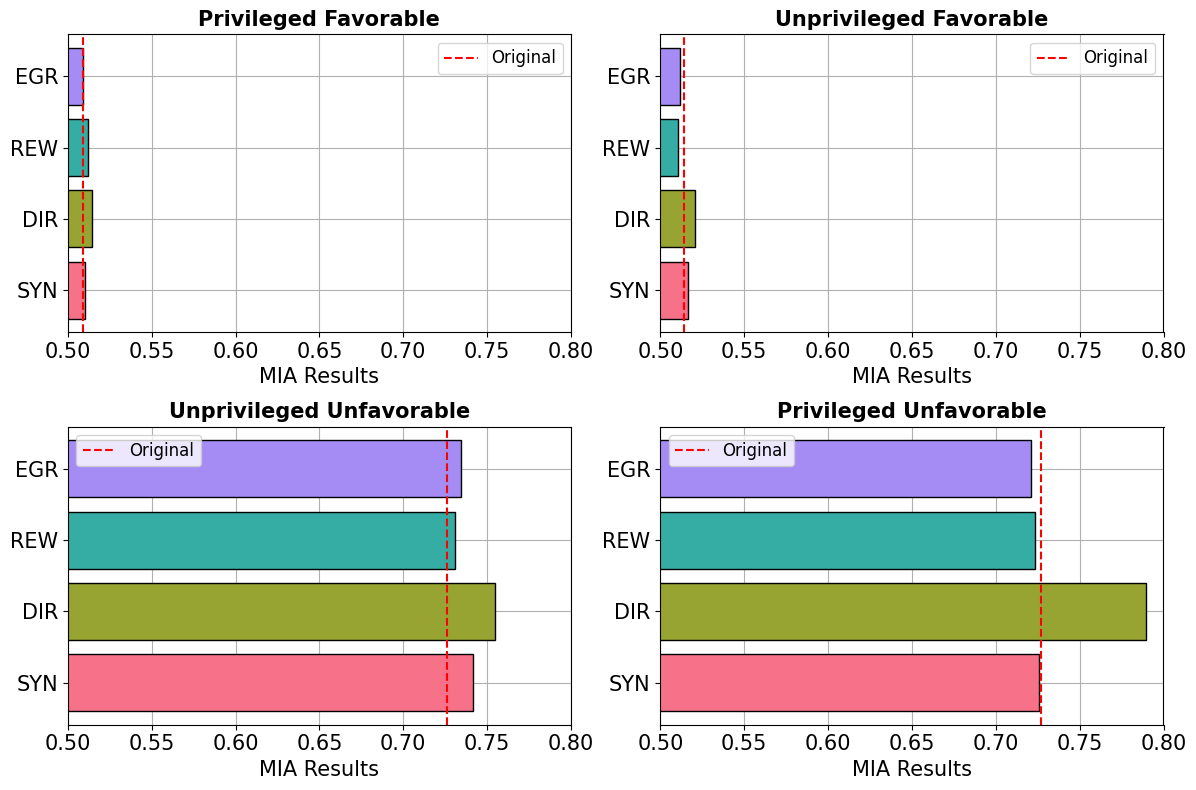

In [64]:
# Define subpopulations and methods
subpopulations = [
    "Privileged Favorable", 
    "Unprivileged Favorable", 
    "Unprivileged Unfavorable", 
    "Privileged Unfavorable"
]
subpop_mapping = {
    "Privileged Favorable": "subpopulation_1.0_label_1.0_mia_privacy_risk",
    "Unprivileged Favorable": "subpopulation_0.0_label_1.0_mia_privacy_risk",
    "Unprivileged Unfavorable": "subpopulation_0.0_label_0.0_mia_privacy_risk",
    "Privileged Unfavorable": "subpopulation_1.0_label_0.0_mia_privacy_risk",
}

methods = ["SYN", "DIR", "REW", "EGR"]
method_mapping = {
    "transf": "SYN",
    "eg": "EGR",
    "dir": "DIR",
    "rew": "REW",
}

# Prepare data for plotting
data = {subpop: [] for subpop in subpopulations}
orig_values = {}

for subpop, metric in subpop_mapping.items():
    # Extract Original method values
    orig_value = df[(df["Method"] == "orig") & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
    orig_values[subpop] = orig_value

    # Extract other method values
    for method, display_name in method_mapping.items():
        value = df[(df["Method"] == method) & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
        data[subpop].append(value)

# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
palette = sns.color_palette("husl", len(methods))

for idx, subpop in enumerate(subpopulations):
    accuracies = data[subpop]
    ax = axes[idx]
    
    # Push gridlines to the back
    ax.set_axisbelow(True)

    # Horizontal bar chart
    ax.barh(methods, accuracies, color=palette, edgecolor='black')

    # Add dashed line for 'orig' MIA accuracy
    ax.axvline(orig_values[subpop], color='red', linestyle='--', label='Original')

    # Enable gridlines
    ax.grid(True)

    # Title and labels
    ax.set_title(f"{subpop}", fontsize=15, weight='bold')
    ax.set_xlabel("MIA Results", fontsize=15)
    ax.set_xlim(0.5, 0.80)  # Adjust range if needed

    # Adjust tick label font size
    ax.tick_params(axis='y', labelsize=15)  # Methods
    ax.tick_params(axis='x', labelsize=15)  # X-axis values

    # Adjust legend font size
    ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Vis. 1 (NN)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
file_path = "./nn_mia2_results/mlp_mia2_law_sex_mia_privacy_risks_metrics_2025-03-25.csv"
df = pd.read_csv(file_path)
df

,Unnamed: 0,Method,Metric,Mean Privacy Risk,Error
0,0,orig,entire_dataset_mia_privacy_risk,0.508858,0.004530
1,1,orig,subpopulation_0.0_label_0.0_mia_privacy_risk,0.539168,0.030989
2,2,orig,subpopulation_0.0_label_1.0_mia_privacy_risk,0.509561,0.007369
3,3,orig,subpopulation_1.0_label_0.0_mia_privacy_risk,0.524608,0.028134
4,4,orig,subpopulation_1.0_label_1.0_mia_privacy_risk,0.509505,0.006723
5,5,transf,entire_dataset_mia_privacy_risk,0.508828,0.004849
6,6,transf,subpopulation_0.0_label_0.0_mia_privacy_risk,0.537248,0.028496
7,7,transf,subpopulation_0.0_label_1.0_mia_privacy_risk,0.509793,0.007595
8,8,transf,subpopulation_1.0_label_0.0_mia_privacy_risk,0.528194,0.027073
9,9,transf,subpopulation_1.0_label_1.0_mia_privacy_risk,0.509442,0.006644


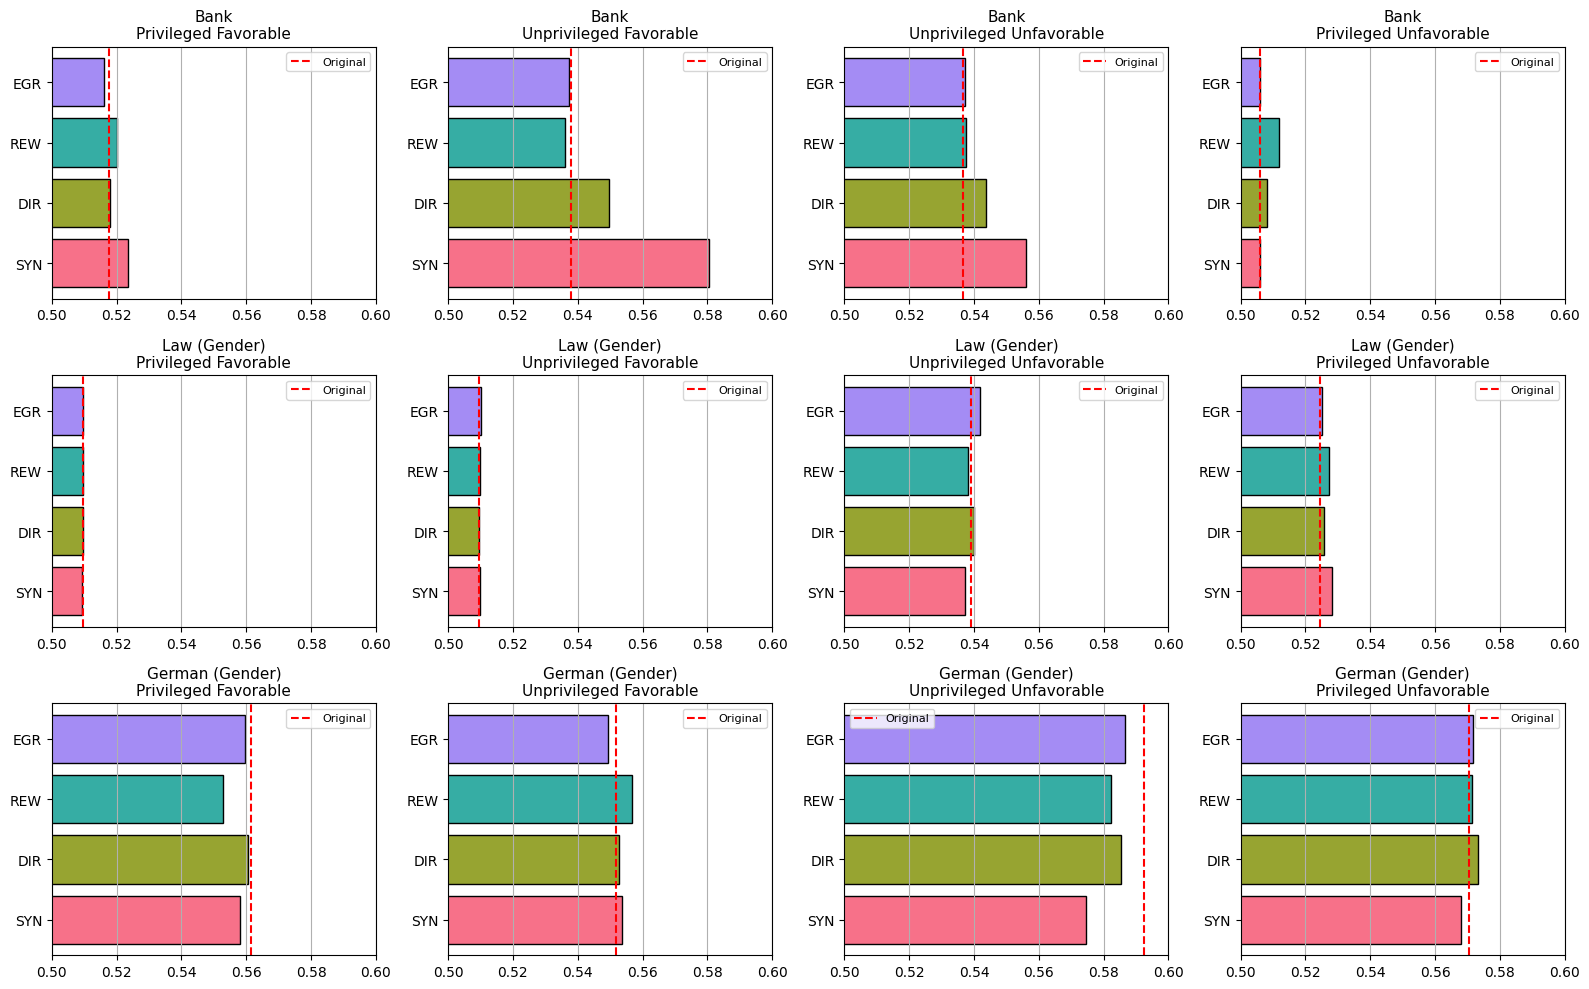

In [49]:
# Update file paths with your correct local paths
file_paths = {
    "Bank": "./nn_mia2_results/mlp_mia2_bank_mia_privacy_risks_metrics_2025-03-25.csv",
    "Law (Gender)": "./nn_mia2_results/mlp_mia2_law_sex_mia_privacy_risks_metrics_2025-03-25.csv",
    "German (Gender)": "./nn_mia2_results/mlp_mia2_german_sex_mia_privacy_risks_metrics_2025-03-25.csv"
}

subpopulations = [
    "Privileged Favorable", 
    "Unprivileged Favorable", 
    "Unprivileged Unfavorable", 
    "Privileged Unfavorable"
]
subpop_mapping = {
    "Privileged Favorable": "subpopulation_1.0_label_1.0_mia_privacy_risk",
    "Unprivileged Favorable": "subpopulation_0.0_label_1.0_mia_privacy_risk",
    "Unprivileged Unfavorable": "subpopulation_0.0_label_0.0_mia_privacy_risk",
    "Privileged Unfavorable": "subpopulation_1.0_label_0.0_mia_privacy_risk",
}
methods = ["SYN", "DIR", "REW", "EGR"]
method_mapping = {
    "transf": "SYN",
    "eg": "EGR",
    "dir": "DIR",
    "rew": "REW",
}

# Plotting
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.reshape(3, 4)
palette = sns.color_palette("husl", len(methods))

for row_idx, (dataset_name, file_path) in enumerate(file_paths.items()):
    df = pd.read_csv(file_path)
    for col_idx, (subpop, metric) in enumerate(subpop_mapping.items()):
        ax = axes[row_idx, col_idx]
        orig_value = df[(df["Method"] == "orig") & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
        accs = []

        for method, label in method_mapping.items():
            val = df[(df["Method"] == method) & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
            accs.append(val)

        ax.barh(methods, accs, color=palette, edgecolor='black')
        ax.axvline(orig_value, color='red', linestyle='--', label='Original')
        ax.set_title(f"{dataset_name}\n{subpop}", fontsize=11)
        ax.set_xlim(0.5, 0.6)
        ax.grid(True, axis='x')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

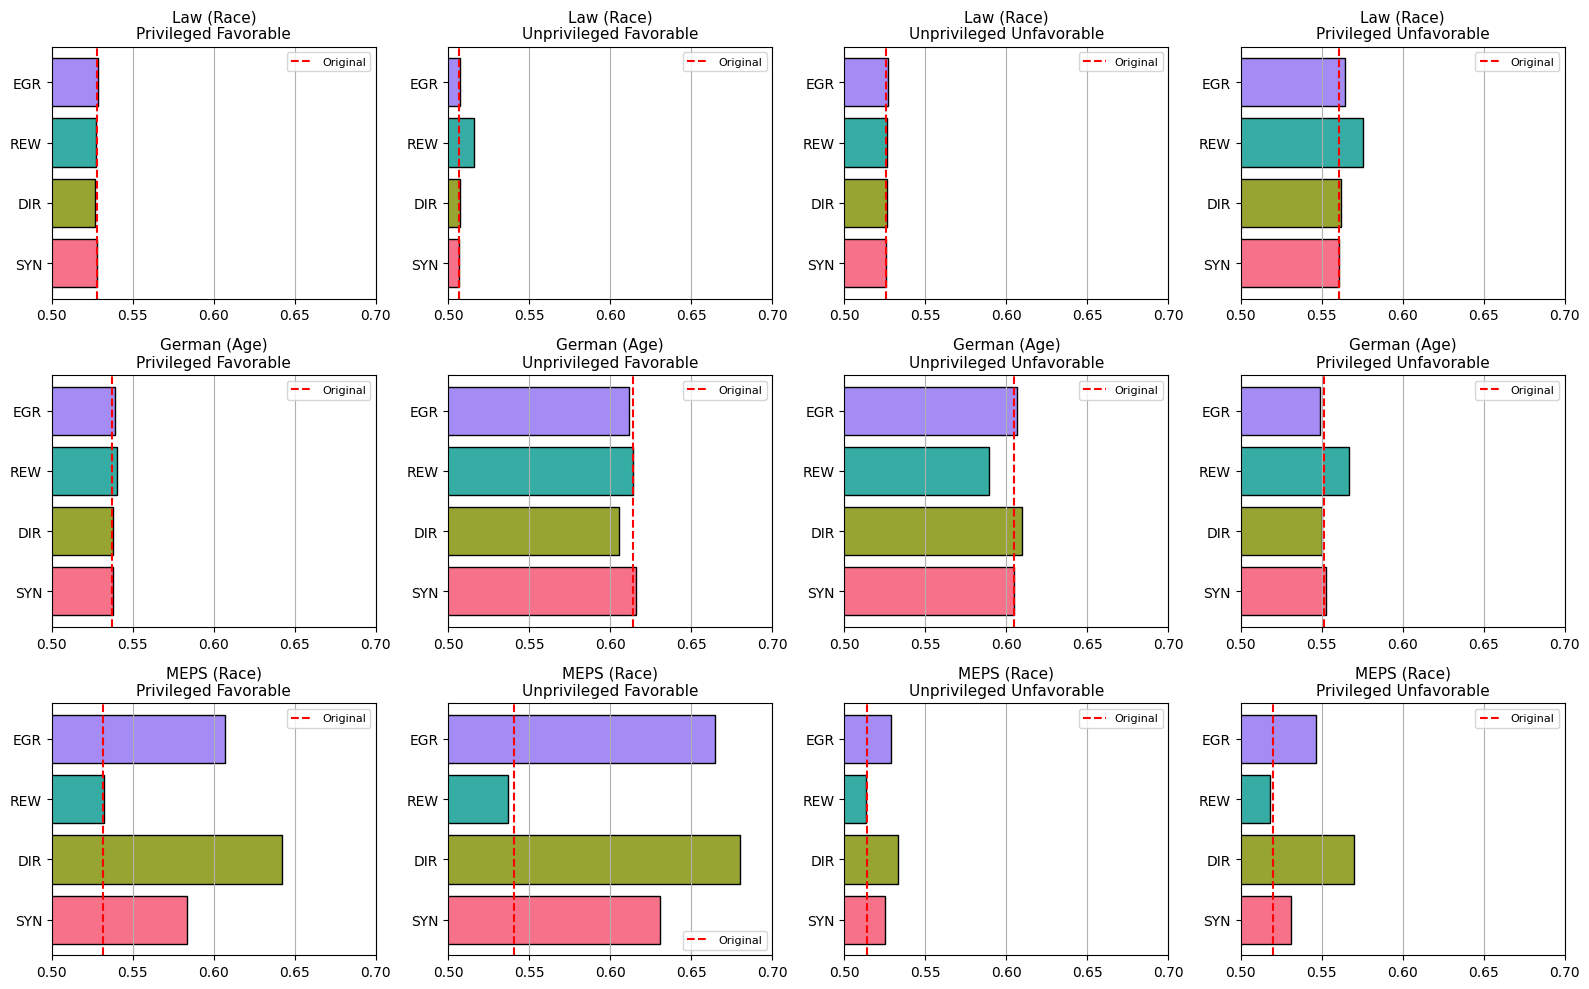

In [52]:
# Update file paths with your correct local paths
file_paths = {
    "Law (Race)": "./nn_mia2_results/mlp_mia2_law_race_mia_privacy_risks_metrics_2025-03-25.csv",
    "German (Age)": "./nn_mia2_results/mlp_mia2_german_age_mia_privacy_risks_metrics_2025-03-25.csv",
    "MEPS (Race)": "./nn_mia2_results/mlp_mia2_meps19_mia_privacy_risks_metrics_2025-03-25.csv"
}

subpopulations = [
    "Privileged Favorable", 
    "Unprivileged Favorable", 
    "Unprivileged Unfavorable", 
    "Privileged Unfavorable"
]
subpop_mapping = {
    "Privileged Favorable": "subpopulation_1.0_label_1.0_mia_privacy_risk",
    "Unprivileged Favorable": "subpopulation_0.0_label_1.0_mia_privacy_risk",
    "Unprivileged Unfavorable": "subpopulation_0.0_label_0.0_mia_privacy_risk",
    "Privileged Unfavorable": "subpopulation_1.0_label_0.0_mia_privacy_risk",
}
methods = ["SYN", "DIR", "REW", "EGR"]
method_mapping = {
    "transf": "SYN",
    "eg": "EGR",
    "dir": "DIR",
    "rew": "REW",
}

# Plotting
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.reshape(3, 4)
palette = sns.color_palette("husl", len(methods))

for row_idx, (dataset_name, file_path) in enumerate(file_paths.items()):
    df = pd.read_csv(file_path)
    for col_idx, (subpop, metric) in enumerate(subpop_mapping.items()):
        ax = axes[row_idx, col_idx]
        orig_value = df[(df["Method"] == "orig") & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
        accs = []

        for method, label in method_mapping.items():
            val = df[(df["Method"] == method) & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
            accs.append(val)

        ax.barh(methods, accs, color=palette, edgecolor='black')
        ax.axvline(orig_value, color='red', linestyle='--', label='Original')
        ax.set_title(f"{dataset_name}\n{subpop}", fontsize=11)
        ax.set_xlim(0.5, 0.7)
        ax.grid(True, axis='x')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

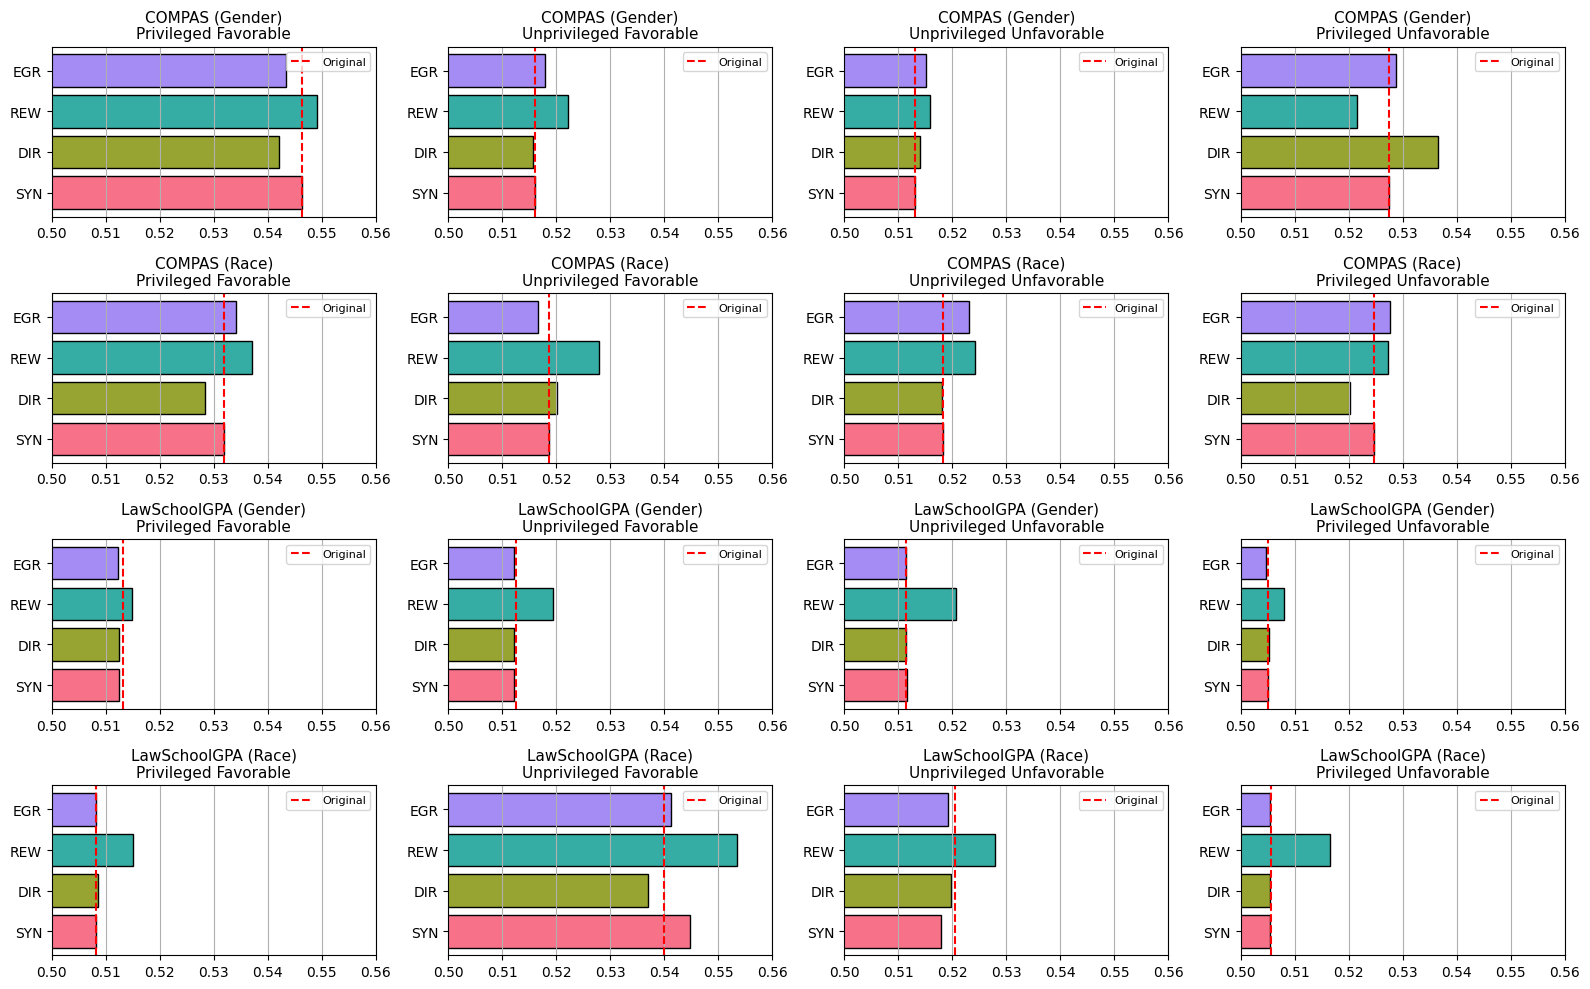

In [56]:
# Update file paths with your correct local paths
file_paths = {
    "COMPAS (Gender)": "./nn_mia2_results/mlp_mia2_compas_sex_mia_privacy_risks_metrics_2025-03-25.csv",
    "COMPAS (Race)": "./nn_mia2_results/mlp_mia2_compas_race_mia_privacy_risks_metrics_2025-03-25.csv",
    "LawSchoolGPA (Gender)": "./nn_mia2_results/mlp_mia2_law_gender_aif_mia_privacy_risks_metrics_2025-03-25.csv",
    "LawSchoolGPA (Race)": "./nn_mia2_results/mlp_mia2_law_race_aif_mia_privacy_risks_metrics_2025-03-25.csv"
}

subpopulations = [
    "Privileged Favorable", 
    "Unprivileged Favorable", 
    "Unprivileged Unfavorable", 
    "Privileged Unfavorable"
]
subpop_mapping = {
    "Privileged Favorable": "subpopulation_1.0_label_1.0_mia_privacy_risk",
    "Unprivileged Favorable": "subpopulation_0.0_label_1.0_mia_privacy_risk",
    "Unprivileged Unfavorable": "subpopulation_0.0_label_0.0_mia_privacy_risk",
    "Privileged Unfavorable": "subpopulation_1.0_label_0.0_mia_privacy_risk",
}
methods = ["SYN", "DIR", "REW", "EGR"]
method_mapping = {
    "transf": "SYN",
    "eg": "EGR",
    "dir": "DIR",
    "rew": "REW",
}

# Plotting
fig, axes = plt.subplots(4, 4, figsize=(16, 10))
axes = axes.reshape(4, 4)
palette = sns.color_palette("husl", len(methods))

for row_idx, (dataset_name, file_path) in enumerate(file_paths.items()):
    df = pd.read_csv(file_path)
    for col_idx, (subpop, metric) in enumerate(subpop_mapping.items()):
        ax = axes[row_idx, col_idx]
        orig_value = df[(df["Method"] == "orig") & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
        accs = []

        for method, label in method_mapping.items():
            val = df[(df["Method"] == method) & (df["Metric"] == metric)]["Mean Privacy Risk"].values[0]
            accs.append(val)

        ax.barh(methods, accs, color=palette, edgecolor='black')
        ax.axvline(orig_value, color='red', linestyle='--', label='Original')
        ax.set_title(f"{dataset_name}\n{subpop}", fontsize=11)
        ax.set_xlim(0.5, 0.56)
        ax.grid(True, axis='x')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

## Vis. 2

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [78]:
# Step 1: Read all CSV files (one per dataset)
# Change the pattern if your files are located elsewhere.
csv_files = glob.glob("mia2_results/*train_test_accuracies*.csv")  # all CSV files in the current directory

In [79]:
csv_files

['mia2_results\\cpp_mia1_bank_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_adult_race_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_adult_sex_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_bank_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_compas_race_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_compas_sex_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_german_age_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_german_sex_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_law_gender_aif_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_law_race_aif_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_law_race_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_law_sex_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\cpp_mia2_meps19_train_test_accuracies_2024-12-30.csv',
 'mia2_results\\mia2_adult_race_train_te

In [82]:
for file in csv_files[13:]:
    print(file)
    print(pd.read_csv(file))

mia2_results\mia2_adult_race_train_test_accuracies_2024-12-30.csv
           Unnamed: 0  orig_acc_mean  transf_acc_mean  reweigh_acc_mean  \
0  accuracy_train_0_-       0.964809         0.947228          0.929007   
1  accuracy_train_0_+       0.304739         0.515043          0.465010   
2  accuracy_train_1_-       0.924246         0.924590          0.927408   
3  accuracy_train_1_+       0.410903         0.409154          0.401179   
4   accuracy_test_0_-       0.960530         0.943381          0.920719   
5   accuracy_test_0_+       0.272929         0.346360          0.446229   
6   accuracy_test_1_-       0.920756         0.920847          0.923854   
7   accuracy_test_1_+       0.409692         0.408250          0.400627   
8      accuracy_train       0.803378         0.800065          0.802380   
9       accuracy_test       0.800947         0.800264          0.799940   

   dir_acc_mean  eg_acc_mean  
0      0.964809     0.924888  
1      0.304739     0.400589  
2      0.924246

In [23]:
pd.read_csv( 'nn_mia2_results\\mlp_mia2_german_age_train_test_accuracies_2025-03-25.csv')

,Unnamed: 0,orig_acc_mean,orig_acc_std,transf_acc_mean,transf_acc_std,reweigh_acc_mean,reweigh_acc_std,dir_acc_mean,dir_acc_std,eg_acc_mean,eg_acc_std
0,accuracy_train_0_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,accuracy_train_0_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,accuracy_train_1_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
3,accuracy_train_1_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,accuracy_test_0_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,accuracy_test_0_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,accuracy_test_1_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
7,accuracy_test_1_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,accuracy_train,0.303333,0.043880,0.263809,0.042505,0.303333,0.043880,0.303333,0.043880,0.303333,0.043880
9,accuracy_test,0.315000,0.039236,0.315000,0.039236,0.315000,0.039236,0.315000,0.039236,0.315000,0.039236


In [25]:
# These will store the dataset names and computed gap values for each method.
dataset_order = []
summary_data = {}

# Methods we are interested in 
methods = ["orig_acc_mean", "transf_acc_mean", "dir_acc_mean", "reweigh_acc_mean", "eg_acc_mean"]

for file in csv_files:
    # Use the filename (without extension) as the dataset name
    dataset_name = file.split('.')[0].split('\\')[-1].split('_train')[0].split('mia2_')[-1]
    dataset_order.append(dataset_name)
    
    # Read CSV file
    df = pd.read_csv(file)

    # Step 2: Filter rows for subpopulations.
    # We use rows starting with "Train:" and "Test:".
    train_df = df[df["Unnamed: 0"].str.contains("train_")].copy()
    test_df = df[df["Unnamed: 0"].str.contains("test_")].copy()
    
    # Extract the subpopulation identifier (everything after the colon)
    train_df["subpop"] = train_df["Unnamed: 0"].apply(lambda x: "".join(x.split("_")[-2:]).strip())
    test_df["subpop"] = test_df["Unnamed: 0"].apply(lambda x: "".join(x.split("_")[-2:]).strip())
    
    # Merge the train and test data on subpopulation names
    merged = pd.merge(train_df, test_df, on="subpop", suffixes=("_train", "_test"))
    
    # Step 3: Compute the gap (train - test) for each method and average over subpopulations.
    gap_means = {}
    for m in methods:
        # Convert values to numeric (in case they are strings)
        merged[m + "_train"] = pd.to_numeric(merged[m + "_train"], errors="coerce")
        merged[m + "_test"] = pd.to_numeric(merged[m + "_test"], errors="coerce")
        gap = merged[m + "_train"] - merged[m + "_test"]
        gap_means[m] = gap.mean()
            
    summary_data[dataset_name] = gap_means

In [ ]:
# Create a summary DataFrame with datasets as rows and methods as columns.
summary_df = pd.DataFrame(summary_data).T
summary_df.columns = ["Mean Gap (Original)", "Mean Gap (SYN)", "Mean Gap (DIR)", "Mean Gap (REW)", "Mean Gap (EGR)"]

In [27]:
summary_df

,Mean Gap (Original),Mean Gap (SYN),Mean Gap (DIR),Mean Gap (REW),Mean Gap (EGR)
bank,0.001280,0.029681,0.002342,0.000000,0.009899
compas_race,0.008623,0.008623,0.005132,0.006276,0.000018
compas_sex,0.007655,0.007655,0.009709,0.006936,0.019484
german_age,0.000000,0.000000,0.000000,0.000000,0.000000
german_sex,0.000000,0.000000,0.000000,0.000000,0.000000
law_gender_aif,0.000234,0.000271,-0.000024,0.000000,0.000000
law_race_aif,0.000000,0.000000,-0.000017,0.000000,0.000000
law_race,0.000000,0.000000,0.000000,0.000000,0.000000
law_sex,0.000000,0.000000,0.000000,0.000000,0.000000
meps19,0.023974,0.138792,0.023475,0.143931,0.190930


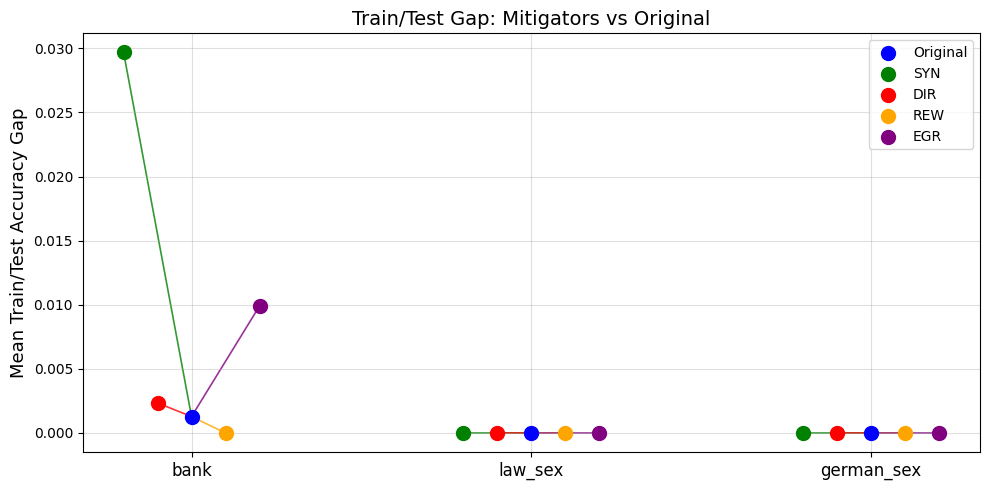

In [34]:
# Selected datasets to include
selected_datasets = ["bank", "law_sex", "german_sex"]

# Define colors and offsets for mitigators
colors = {
    "SYN": "green",
    "DIR": "red",
    "REW": "orange",
    "EGR": "purple"
}
offsets = {
    "SYN": -0.2,
    "DIR": -0.1,
    "REW": 0.1,
    "EGR": 0.2
}

plt.figure(figsize=(10, 5))

for i, dataset in enumerate(selected_datasets):
    orig_gap = summary_df.loc[dataset, "Mean Gap (Original)"]
    
    # Plot the original gap
    plt.scatter(i, orig_gap, color="blue", label="Original" if i == 0 else "", s=100, zorder=5)
    
    for method, offset in offsets.items():
        col = f"Mean Gap ({method})"
        mitigator_gap = summary_df.loc[dataset, col]
        color = colors[method]
        x_pos = i + offset
        y_pos = mitigator_gap

        # Plot mitigator gap
        plt.scatter(x_pos, y_pos, color=color, label=method if i == 0 else "", s=100, zorder=5)

        # Connect with line
        plt.plot([x_pos, i], [y_pos, orig_gap], color=color, linewidth=1.2, alpha=0.8, zorder=1)

# Final touches
plt.xticks(range(len(selected_datasets)), selected_datasets, fontsize=12)
plt.ylabel("Mean Train/Test Accuracy Gap", fontsize=13)
plt.grid(alpha=0.4)
plt.legend(fontsize=10)
plt.title("Train/Test Gap: Mitigators vs Original", fontsize=14)
plt.tight_layout()
plt.show()

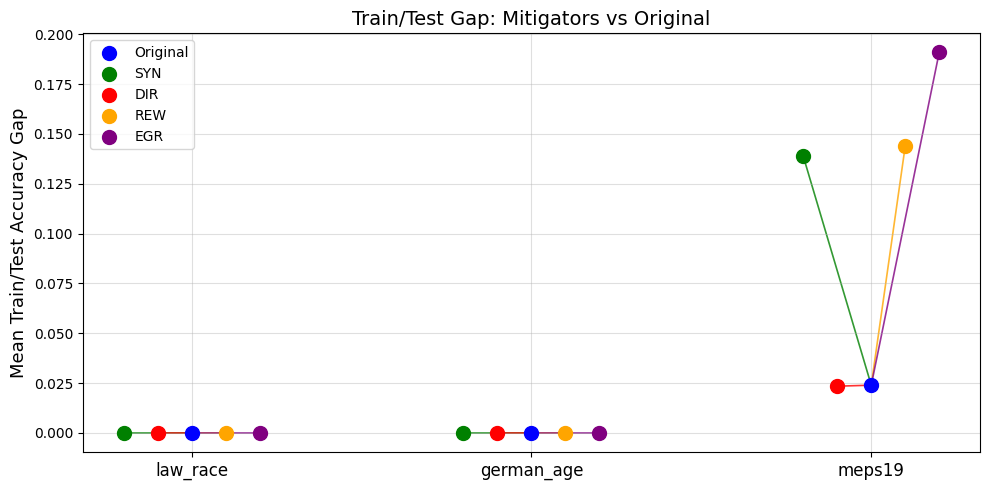

In [35]:
# Selected datasets to include
selected_datasets = ["law_race", "german_age", "meps19"]

# Define colors and offsets for mitigators
colors = {
    "SYN": "green",
    "DIR": "red",
    "REW": "orange",
    "EGR": "purple"
}
offsets = {
    "SYN": -0.2,
    "DIR": -0.1,
    "REW": 0.1,
    "EGR": 0.2
}

plt.figure(figsize=(10, 5))

for i, dataset in enumerate(selected_datasets):
    orig_gap = summary_df.loc[dataset, "Mean Gap (Original)"]
    
    # Plot the original gap
    plt.scatter(i, orig_gap, color="blue", label="Original" if i == 0 else "", s=100, zorder=5)
    
    for method, offset in offsets.items():
        col = f"Mean Gap ({method})"
        mitigator_gap = summary_df.loc[dataset, col]
        color = colors[method]
        x_pos = i + offset
        y_pos = mitigator_gap

        # Plot mitigator gap
        plt.scatter(x_pos, y_pos, color=color, label=method if i == 0 else "", s=100, zorder=5)

        # Connect with line
        plt.plot([x_pos, i], [y_pos, orig_gap], color=color, linewidth=1.2, alpha=0.8, zorder=1)

# Final touches
plt.xticks(range(len(selected_datasets)), selected_datasets, fontsize=12)
plt.ylabel("Mean Train/Test Accuracy Gap", fontsize=13)
plt.grid(alpha=0.4)
plt.legend(fontsize=10)
plt.title("Train/Test Gap: Mitigators vs Original", fontsize=14)
plt.tight_layout()
plt.show()

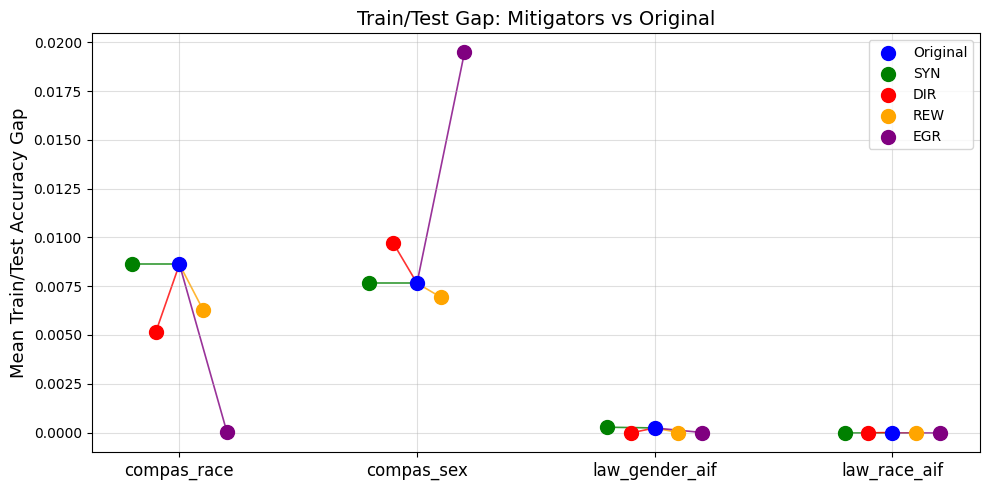

In [38]:
# Selected datasets to include
selected_datasets = ["compas_race", "compas_sex", "law_gender_aif", "law_race_aif"]

# Define colors and offsets for mitigators
colors = {
    "SYN": "green",
    "DIR": "red",
    "REW": "orange",
    "EGR": "purple"
}
offsets = {
    "SYN": -0.2,
    "DIR": -0.1,
    "REW": 0.1,
    "EGR": 0.2
}

plt.figure(figsize=(10, 5))

for i, dataset in enumerate(selected_datasets):
    orig_gap = summary_df.loc[dataset, "Mean Gap (Original)"]
    
    # Plot the original gap
    plt.scatter(i, orig_gap, color="blue", label="Original" if i == 0 else "", s=100, zorder=5)
    
    for method, offset in offsets.items():
        col = f"Mean Gap ({method})"
        mitigator_gap = summary_df.loc[dataset, col]
        color = colors[method]
        x_pos = i + offset
        y_pos = mitigator_gap

        # Plot mitigator gap
        plt.scatter(x_pos, y_pos, color=color, label=method if i == 0 else "", s=100, zorder=5)

        # Connect with line
        plt.plot([x_pos, i], [y_pos, orig_gap], color=color, linewidth=1.2, alpha=0.8, zorder=1)

# Final touches
plt.xticks(range(len(selected_datasets)), selected_datasets, fontsize=12)
plt.ylabel("Mean Train/Test Accuracy Gap", fontsize=13)
plt.grid(alpha=0.4)
plt.legend(fontsize=10)
plt.title("Train/Test Gap: Mitigators vs Original", fontsize=14)
plt.tight_layout()
plt.show()

## Vis. 3 (RF)

In [70]:
csv_files = []

In [71]:
# Step 1: Read all CSV files (one per dataset)
# Change the pattern if your files are located elsewhere.
csv_files = glob.glob("rf_new_mia2_results/*train_test_accuracies*.csv")  # all CSV files in the current directory
csv_files

['rf_new_mia2_results\\rf_mia2_bank_train_test_accuracies_2025-03-22_depth10.csv',
 'rf_new_mia2_results\\rf_mia2_bank_train_test_accuracies_2025-03-23_depth15.csv',
 'rf_new_mia2_results\\rf_mia2_bank_train_test_accuracies_2025-03-23_depth29.csv']

In [72]:
csv_files.extend(glob.glob("dprf_new_mia2_results/*train_test_accuracies*.csv"))
csv_files

['rf_new_mia2_results\\rf_mia2_bank_train_test_accuracies_2025-03-22_depth10.csv',
 'rf_new_mia2_results\\rf_mia2_bank_train_test_accuracies_2025-03-23_depth15.csv',
 'rf_new_mia2_results\\rf_mia2_bank_train_test_accuracies_2025-03-23_depth29.csv',
 'dprf_new_mia2_results\\dprf_mia2_bank_train_test_accuracies_2025-03-23_depth10_eps1.csv',
 'dprf_new_mia2_results\\dprf_mia2_bank_train_test_accuracies_2025-03-23_depth15_eps1.csv']

In [73]:
pd.read_csv(csv_files[3])

,Unnamed: 0,orig_acc_mean,orig_acc_std,transf_acc_mean,transf_acc_std,reweigh_acc_mean,reweigh_acc_std,dir_acc_mean,dir_acc_std,eg_acc_mean,eg_acc_std
0,accuracy_train_0_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.925505,0.115086
1,accuracy_train_0_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101152,0.101852
2,accuracy_train_1_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.927000,0.122064
3,accuracy_train_1_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085501,0.109770
4,accuracy_test_0_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.921768,0.130153
5,accuracy_test_0_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099576,0.106058
6,accuracy_test_1_-,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.926250,0.123568
7,accuracy_test_1_+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089026,0.122237
8,accuracy_train,0.872858,0.005015,0.885123,0.005197,0.872858,0.005015,0.872858,0.005015,0.820312,0.091343
9,accuracy_test,0.871790,0.004045,0.871790,0.004045,0.871790,0.004045,0.871790,0.004045,0.819682,0.090368


In [68]:
# File paths for RF and DPRF with depth 10 and 15
csv_files = {
    "RF_10": "rf_new_mia2_results/rf_mia2_bank_train_test_accuracies_2025-03-22_depth10.csv",
    "RF_15": "rf_new_mia2_results/rf_mia2_bank_train_test_accuracies_2025-03-23_depth15.csv",
    "DPRF_10": "dprf_new_mia2_results/dprf_mia2_bank_train_test_accuracies_2025-03-23_depth10_eps1.csv",
    "DPRF_15": "dprf_new_mia2_results/dprf_mia2_bank_train_test_accuracies_2025-03-23_depth15_eps1.csv"
}

# Subpopulation labels and their corresponding CSV labels
subpop_labels = {
    "1-": "accuracy_test_1_-",
    "1+": "accuracy_test_1_+",
    "0-": "accuracy_test_0_-",
    "0+": "accuracy_test_0_+"
}

# Colors for depth levels
depth_colors = {
    "10": "red",
    "15": "blue"
}

# Load data and organize into dictionary
data = {subpop: {} for subpop in subpop_labels}
for name, path in csv_files.items():
    df = pd.read_csv(path)
    method = "RF" if "rf_" in name else "DPRF"
    depth = "10" if "_10" in name else "15"

    for label, row_name in subpop_labels.items():
        acc = df[df["Unnamed: 0"] == row_name]["orig_acc_mean"].values[0]
        data[label][f"{method}_{depth}"] = acc
    
data

{'1-': {'DPRF_10': 1.0, 'DPRF_15': 0.9936488669771654},
 '1+': {'DPRF_10': 0.0, 'DPRF_15': 0.127755548130146},
 '0-': {'DPRF_10': 1.0, 'DPRF_15': 0.9657299448111883},
 '0+': {'DPRF_10': 0.0, 'DPRF_15': 0.2385185002509645}}

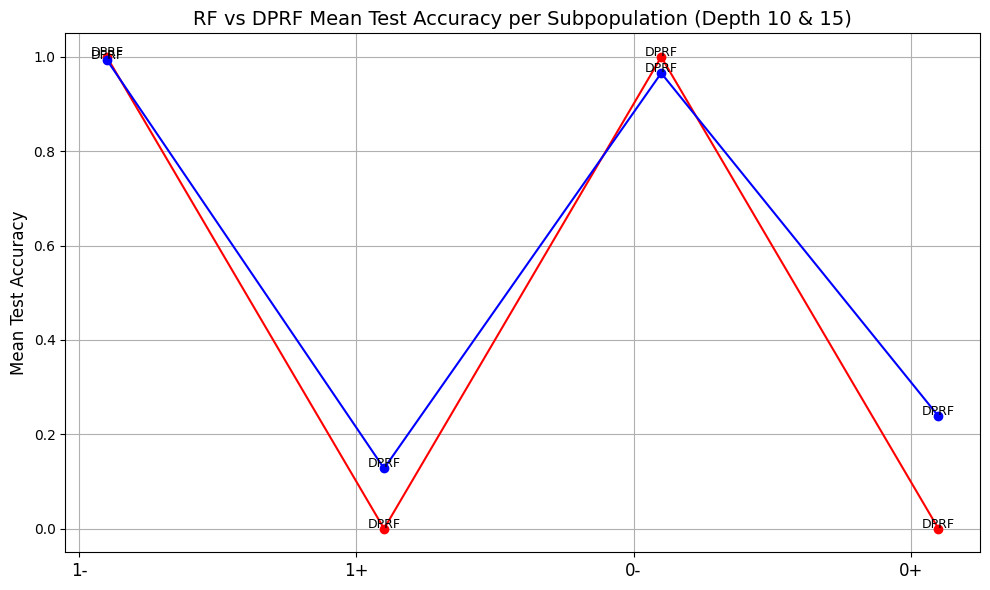

In [67]:


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x_positions = list(subpop_labels.keys())

for depth in ["10", "15"]:
    for method in ["RF", "DPRF"]:
        y_values = [data[subpop].get(f"{method}_{depth}", None) for subpop in x_positions]
        x_vals = [i + (-0.1 if method == "RF" else 0.1) for i in range(len(x_positions))]
        ax.plot(x_vals, y_values, marker='o', linestyle='-', color=depth_colors[depth])

        for i, subpop in enumerate(x_positions):
            label = f"{method}"
            x = x_vals[i]
            y = y_values[i]
            if y is not None:
                ax.text(x, y + 0.002, label, ha='center', fontsize=9)

# Final adjustments
ax.set_xticks(range(len(x_positions)))
ax.set_xticklabels(x_positions, fontsize=12)
ax.set_ylabel("Mean Test Accuracy", fontsize=12)
ax.set_title("RF vs DPRF Mean Test Accuracy per Subpopulation (Depth 10 & 15)", fontsize=14)
ax.grid(True)
plt.tight_layout()
plt.show()